# Spotify Data Analysis with Python

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)
sns.set_style("whitegrid")

## 2. Load Data

In [48]:
tracks = pd.read_csv("tracks.csv")
artists = pd.read_csv("artists.csv")

print("Artists Data:")
print(artists.head())
print("Tracks Data:")
print(tracks.head())

Artists Data:
                       id  followers genres  \
0  0DheY5irMjBUeLybbCUEZ2        0.0     []   
1  0DlhY15l3wsrnlfGio2bjU        5.0     []   
2  0DmRESX2JknGPQyO15yxg7        0.0     []   
3  0DmhnbHjm1qw6NCYPeZNgJ        0.0     []   
4  0Dn11fWM7vHQ3rinvWEl4E        2.0     []   

                                             name  popularity  
0  Armid & Amir Zare Pashai feat. Sara Rouzbehani           0  
1                                     ปูนา ภาวิณี           0  
2                                           Sadaa           0  
3                                       Tra'gruda           0  
4                          Ioannis Panoutsopoulos           0  
Tracks Data:
                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado          

## 3. Data Understanding

In [51]:
print("\nTracks Info:")
print(tracks.info())

print("\nArtists Info:")
print(artists.info())

print("\nTracks Description:")
print(tracks.describe())


Tracks Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  livene

## 4. Data Cleaning

In [54]:
# Check missing values
print("\nMissing Values (Tracks):")
print(tracks.isnull().sum())

print("\nMissing Values (Artists):")
print(artists.isnull().sum())



Missing Values (Tracks):
id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

Missing Values (Artists):
id             0
followers     13
genres         0
name           3
popularity     0
dtype: int64


In [60]:
# Drop rows with missing important features
tracks.dropna(subset=['popularity', 'danceability', 'energy'], inplace=True)

In [62]:
# Fill numeric missing values with mean
tracks.fillna(tracks.mean(numeric_only=True), inplace=True)


## 5. Feature Engineering

In [65]:
# Popularity category
tracks['popularity_level'] = pd.cut(
    tracks['popularity'],
    bins=[0, 30, 60, 100],
    labels=['Low', 'Medium', 'High']
)

In [69]:
# Duration in minutes
tracks['duration_min'] = tracks['duration_ms'] / 6000

## 6. Exploratory Data Analysis (EDA)

In [76]:
print("\nEDA Summary:")
print(tracks[['popularity','danceability','energy','tempo',
              'acousticness','loudness','valence']].describe())


EDA Summary:
          popularity   danceability         energy          tempo  \
count  586672.000000  586672.000000  586672.000000  586672.000000   
mean       27.570053       0.563594       0.542036     118.464857   
std        18.370642       0.166103       0.251923      29.764108   
min         0.000000       0.000000       0.000000       0.000000   
25%        13.000000       0.453000       0.343000      95.600000   
50%        27.000000       0.577000       0.549000     117.384000   
75%        41.000000       0.686000       0.748000     136.321000   
max       100.000000       0.991000       1.000000     246.381000   

        acousticness       loudness        valence  
count  586672.000000  586672.000000  586672.000000  
mean        0.449863     -10.206067       0.552292  
std         0.348837       5.089328       0.257671  
min         0.000000     -60.000000       0.000000  
25%         0.096900     -12.891000       0.346000  
50%         0.422000      -9.243000       0.56

## 7. Data Visualizations

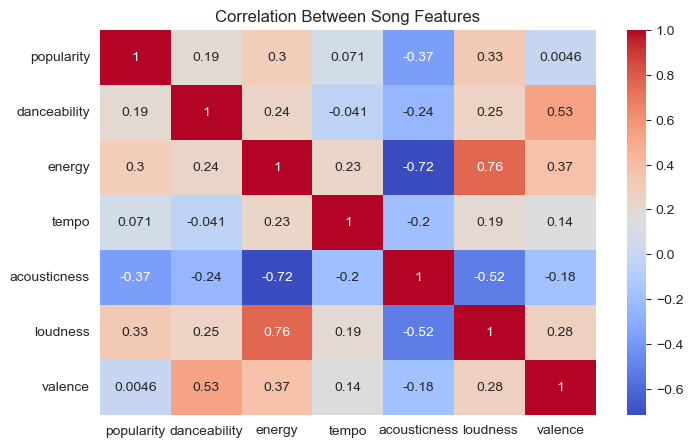

In [78]:
# Correlation Heatmap
plt.figure()
sns.heatmap(
    tracks[['popularity','danceability','energy','tempo',
            'acousticness','loudness','valence']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Between Song Features")
plt.show()

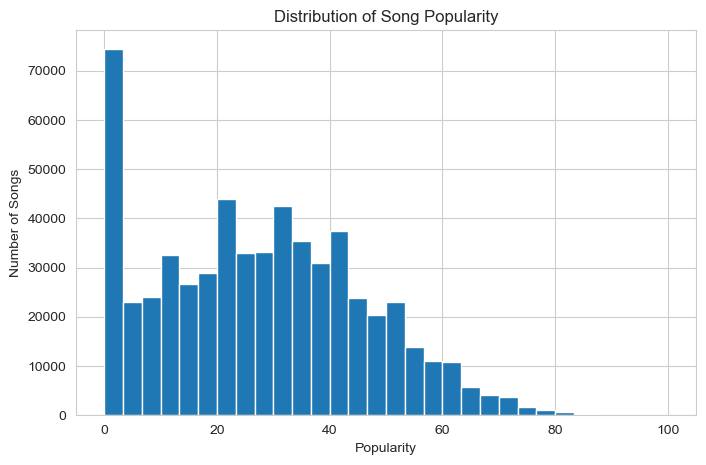

In [81]:
# Popularity Distribution
plt.hist(tracks['popularity'], bins=30)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.show()

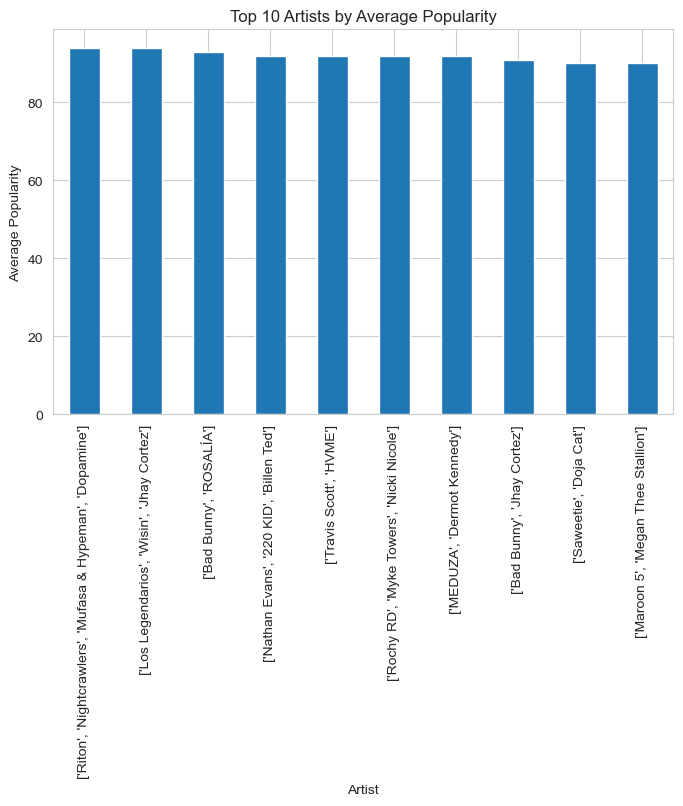

In [85]:
# Top 10 Artists by Average Popularity
top_artists = tracks.groupby('artists')['popularity'] \
                    .mean().sort_values(ascending=False).head(10)

top_artists.plot(kind='bar')
plt.title("Top 10 Artists by Average Popularity")
plt.xlabel("Artist")
plt.ylabel("Average Popularity")
plt.show()

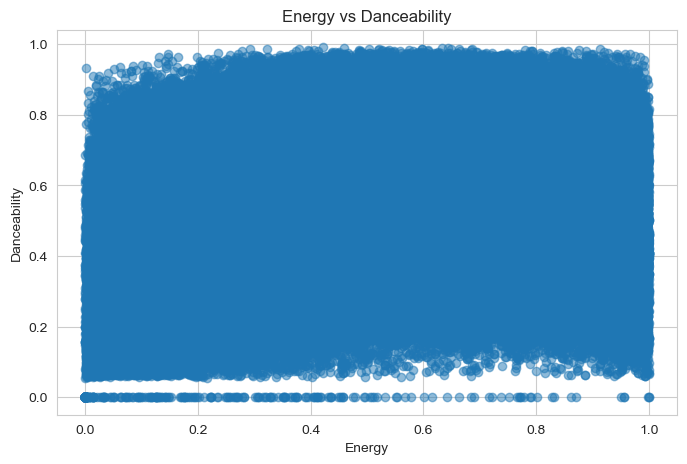

In [87]:
# Energy vs Danceability
plt.scatter(tracks['energy'], tracks['danceability'], alpha=0.5)
plt.title("Energy vs Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.show()

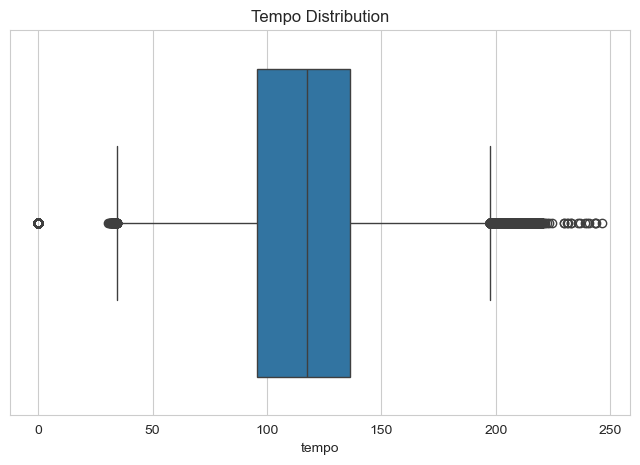

In [89]:
# Tempo Distribution
sns.boxplot(x=tracks['tempo'])
plt.title("Tempo Distribution")
plt.show()


## 8. Genre Analysis


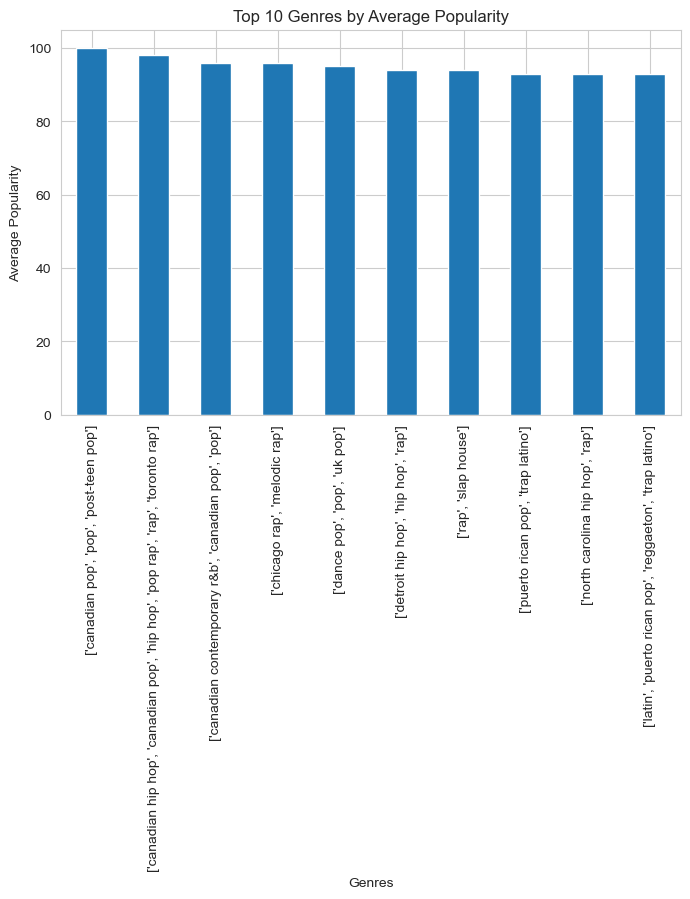

In [98]:

genre_popularity = artists.groupby('genres')['popularity'] \
                          .mean().sort_values(ascending=False).head(10)

genre_popularity.plot(kind='bar')
plt.title("Top 10 Genres by Average Popularity")
plt.xlabel("Genres")
plt.ylabel("Average Popularity")
plt.show()

## 9. Artist Trend Analysis

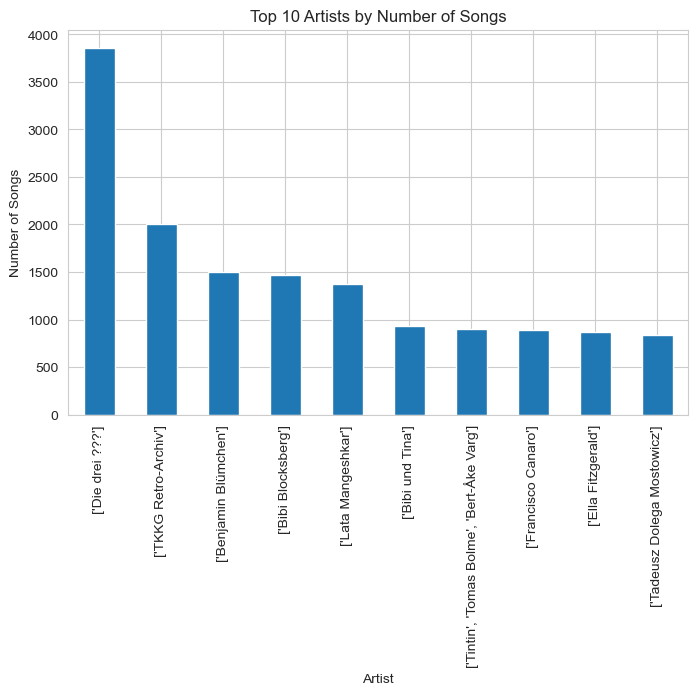

In [104]:
artist_song_count = tracks['artists'].value_counts().head(10)

artist_song_count.plot(kind='bar')
plt.title("Top 10 Artists by Number of Songs")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.show()

## 10. Key Insights Output

In [107]:
print("\nKey Insights:")
print("- High energy and danceable songs tend to be more popular")
print("- Loudness and energy have strong positive correlation")
print("- Certain genres consistently dominate popularity")
print("- Artists with more releases gain higher visibility")
print("- Extremely high or low tempo songs are less common among hits")


Key Insights:
- High energy and danceable songs tend to be more popular
- Loudness and energy have strong positive correlation
- Certain genres consistently dominate popularity
- Artists with more releases gain higher visibility
- Extremely high or low tempo songs are less common among hits
